### 목표
- 붓꽃의 꽃잎의 길이, 너비 / 꽃받침의 길이, 너비 특성을 활용하여 3가지 붓꽃품종 분류 실습을 진행해보자
- knn모델의 이웃의 숫자를 조정해보자(k의 개수를 조정, 하이퍼파라미터 튜닝)

In [1]:
# 필요한 도구 가지고 오기
import pandas as pd
import matplotlib.pyplot as plt
# knn모델 불러오기
from sklearn.neighbors import KNeighborsClassifier
#정확도 평가 도구 불러오기
from sklearn.metrics import accuracy_score
#iris 데이터 불러오기
from sklearn.datasets import load_iris
#훈련용, 테스트용 분리하는 도구 불러오기
from sklearn.model_selection import train_test_split

데이터 살펴보기

In [2]:
iris_data = load_iris()
iris_data

#딕셔너리랑 비슷함
#datasets 안에서 명칭 : bunch객체
iris_data.keys() #키값들 확인

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
# data 확인
# 특성 = 특징 = 속성 = attribute = 문제 = X
iris_data.data
#iris_data['data']
#iris_data.data.shape 크기 확인

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [4]:
# target 확인
# 실제답 = target = Label
iris_data.target #품종의 순서대로 정리되어 있음 -> 나중에 섞어줘야 함

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
# target_names
iris_data.target_names
# 0 - 'setosa'
# 1 - 'versicolor'
# 2 - 'virginica'

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
#컬럼명 확인
#feature_names
#특성 = 특징 = 기준 = 속성 = attri = 문제
iris_data.feature_names
# 0열 - 'sepal length (cm)' 꽃받침의 길이
# 1열 - 'separ width (cm)' 꽃받침의 너비
# 2열 - 'petal length (cm)' 꽃잎의 길이
# 3열 - 'petal width (cm)' 꽃잎의 너비

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
iris_data.data # -> 컬럼명과 연결해서 데이터 프레임으로 변경할 예정

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [8]:
# 데이터 설명
# DESCR
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

데이터셋 구성하기
- 배열을 DF변경
- 문제와 답으로 분리
- 훈련세트와 테스트세트로 분리

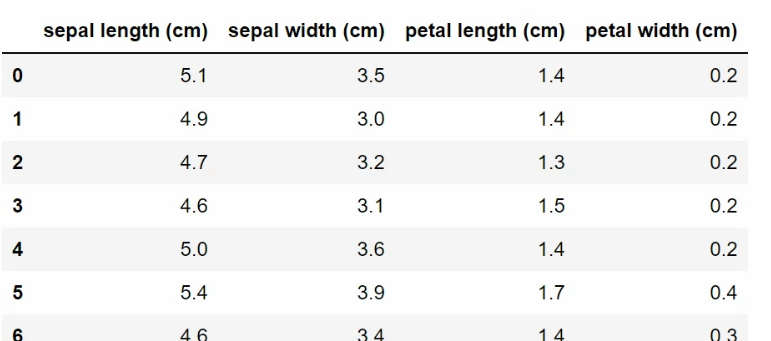

In [9]:
# 특성 데이터를 DF
# 데이터 벨류 -> data
# 특성의 이름 -> feature_names
# 컬렴명 설정 : columns
iris_df = pd.DataFrame(iris_data.data, columns = iris_data.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
# 문제와 답 분리
# 문제 X
# 답 y
# iris_df 문제
X = iris_df
y  = iris_data.target #iris_data['target']

In [21]:
# 훈련세트와 테스트세트로 분리
# train_test_split
# 랜덤하게 섞어서 분리
# 7:3 훈련:테스트
# random_state = 랜덤하게 하는 규칙
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 65)
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
132,6.4,2.8,5.6,2.2
129,7.2,3.0,5.8,1.6
83,6.0,2.7,5.1,1.6
19,5.1,3.8,1.5,0.3
27,5.2,3.5,1.5,0.2
...,...,...,...,...
71,6.1,2.8,4.0,1.3
40,5.0,3.5,1.3,0.3
63,6.1,2.9,4.7,1.4
117,7.7,3.8,6.7,2.2


In [22]:
#크기 확인
print('훈련용문제 :', X_train.shape)
print('훈련용답:', y_train.shape)
print('테스트용문제:', X_test.shape)
print('테스트용답:', y_test.shape)

훈련용문제 : (105, 4)
훈련용답: (105,)
테스트용문제: (45, 4)
테스트용답: (45,)


In [23]:
# y_train 품종 개수 확인해보기
import numpy as np
np.bincount(y_train) # 0-34, 1-36, 2-35

array([34, 36, 35], dtype=int64)

EDA(변수간의 관계 파악)

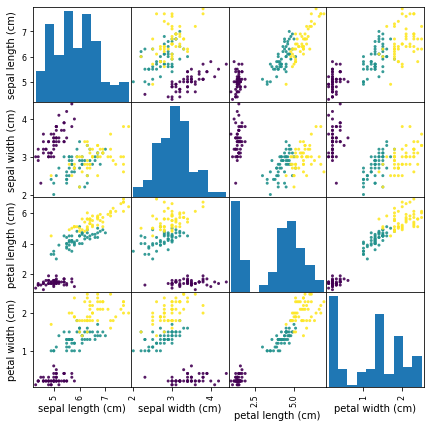

In [24]:
# 산점도 행렬(scatterplot matrix) : 한꺼번에 변수간의 관계를 보여주는 그래프
# 어떤 특성끼리 합쳐졌을때 3가지 붓꽃 품종이 잘 나뉘는지
pd.plotting.scatter_matrix(iris_df,
                           figsize=(7,7),
                           c=y,
                           alpha = 0.9)
import matplotlib.pyplot as plt
plt.show()
# 어떤 특성이 만났을 때 품종 분리가 잘 되는가?

모델링

In [25]:
# 모델 객체 생성
knn_model = KNeighborsClassifier(n_neighbors = 5) # n_neighbors 기본값 5-> 예측시 이웃 5개 확인

In [26]:
# 모델 학습
# fit()
# 훈련용 데이터를 가지고 학습을 시켜주세요!
knn_model.fit(X_train, y_train) #(훈련용문제, 훈련용답)

KNeighborsClassifier()

In [27]:
# 모델 예측
pred = knn_model.predict(X_test)
pred #정확한 답은 아님, 예측 결과일 뿐

array([2, 2, 0, 1, 0, 2, 0, 0, 2, 1, 0, 1, 2, 0, 0, 0, 1, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 1, 0, 1, 2, 0, 1, 1, 1, 2, 0, 2, 2, 0, 0, 1, 1,
       0])

In [28]:
#평가
#accuracy_score(예측값, 테스트실제답)
accuracy_score(pred,y_test)

0.9333333333333333

하이퍼파라미터 튜닝
- 이웃의 개수를 조정(k, neighbors)

In [19]:
# 이웃의 수를 1~49까지 반복해서 변경해보기
# 훈련데이터의 정확도, 테스트데이터의 정확도
test_lst = []
train_lst = []

# 1~49를 담은 변수 설정
n_sett = range(1,50)
for k in n_sett:
    # 모델 생성
    knn_clf = KNeighborsClassifier(n_neighbors = k)
    # 모델 학습
    knn_clf.fit(X_train, y_train)
    # 테스트의 정확도 저장
    pre_test = knn_clf.predict(X_test)
    acc_test = accuracy_score(pre_test, y_test)
    test_lst.append(acc_test)
    # 훈련세트의 정확도 저장
    pre_train = knn_clf.predict(X_train)
    acc_train = accuracy_score(pre_train, y_train)
    train_lst.append(acc_train)

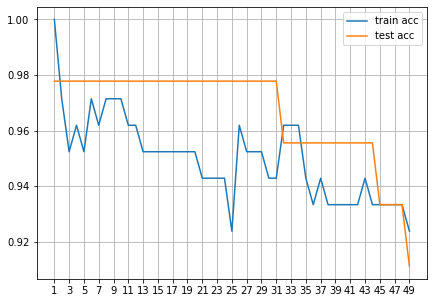

In [20]:
# 하이퍼 파라미터 결과 시각화
# x축은 이웃의 수
# y축은 정확도들
plt.figure(figsize=(7,5))
plt.plot(n_sett, train_lst, label='train acc')
plt.plot(n_sett, test_lst, label = 'test acc')
plt.xticks(range(1,50,2))
plt.grid() #격자
plt.legend() #범례
plt.show()